In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

# DATA

In [2]:
data = pd.read_csv('full_data_labeled.csv')
data = data.drop(columns=['CI SCORE GLOVE','CI SCORE GLOVE 2','CI SCORE GLOVE 50','CI MEAN SCORES']).replace(np.nan,'None')
print(data.shape)

df = data.copy()
df['LabelEncoded'] = df['Label'].replace(['no','yes'],[0,1])
df = df.drop(columns=['Kmeans_clusters','CI SCORE','Label'])
print(df.shape)

numerical_cols = ['Score','Number Of Related Vulnerabilities']
categorical_cols = ['Vulnerability Type(s)', 'Vulnerability Name', 'Access',
                    'Complexity', 'Authentication', 'Conf.', 'Integ.', 'Avail']
categorical_cols_2 = ['Access','Complexity', 'Authentication', 'Conf.', 'Integ.', 'Avail']

label = ['LabelEncoded']
ohe = pd.concat([
    pd.get_dummies(df[categorical_cols],dtype=float),
    df[numerical_cols]
],axis=1)

ohe_2 = pd.concat([
    pd.get_dummies(df[categorical_cols_2],dtype=float),
    df[numerical_cols]
],axis=1)

from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
std_scaler = std_scaler.fit_transform(df[numerical_cols])
ohe_std_scaled = pd.concat([
    pd.get_dummies(df[categorical_cols],dtype=float),
    pd.DataFrame(std_scaler,columns=numerical_cols)
],axis=1)

from sklearn.preprocessing import MinMaxScaler 
mn_scaler = MinMaxScaler()
mn_scaler = mn_scaler.fit_transform(df[numerical_cols])
ohe_mn_scaled = pd.concat([
    pd.get_dummies(df[categorical_cols],dtype=float),
    pd.DataFrame(mn_scaler,columns=numerical_cols)
],axis=1)



(61698, 14)
(61698, 12)


## Model

In [108]:
from sklearn.model_selection import cross_val_score,cross_validate,ShuffleSplit,train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

from sklearn.linear_model import LogisticRegression,RidgeClassifierCV
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB,CategoricalNB
from sklearn.svm import LinearSVC,NuSVC,SVC
from sklearn.neighbors import KNeighborsClassifier,RadiusNeighborsClassifier
from sklearn.neural_network import MLPClassifier,BernoulliRBM
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,RandomForestClassifier,ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier,StackingClassifier,GradientBoostingClassifier,HistGradientBoostingClassifier


X = ohe_mn_scaled
y = df[label]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

model = BernoulliNB()

#Cross Validation score
cv = ShuffleSplit(test_size=0.2)
cv_results = cross_validate(model, X=X_train, y=y_train, cv=cv, return_train_score=True)
cross_val_scores = cross_val_score(model, X=X_train, y=y_train, cv=cv)
print("Mean CV Score:", cross_val_scores.mean())
print("Train Score:", cv_results['train_score'].mean())

#fit the model
model.fit(X_train, y_train)
validation_score = model.score(X_test, y_test)
print("Validation Score:", validation_score)

#evaluation
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))



C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Mean CV Score: 0.9615174230145866
Train Score: 0.9616243731955629
Validation Score: 0.9611831442463533
              precision    recall  f1-score   support

           0       0.92      0.84      0.88      2029
           1       0.97      0.99      0.98     10311

    accuracy                           0.96     12340
   macro avg       0.94      0.91      0.93     12340
weighted avg       0.96      0.96      0.96     12340

[[ 1702   327]
 [  152 10159]]
0.9611831442463533


C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# EDA

In [155]:
df.head(2)
print('Vulnerability Type(s):',df['Vulnerability Type(s)'].nunique())
print('Vulnerability Name:',df['Vulnerability Name'].nunique())
pd.DataFrame(df['Vulnerability Type(s)'].value_counts()).tail(60)
pd.DataFrame(df['Vulnerability Type(s)'].value_counts()).head(60).head(12).index
list(pd.DataFrame(df['Vulnerability Type(s)'].value_counts()).head(60).head(12).index)
l = ['Vulnerability Type(s)_Unknown',
 'Vulnerability Type(s)_XSS',
 'Vulnerability Type(s)_Exec Code',
 'Vulnerability Type(s)_Overflow',
 'Vulnerability Type(s)_DoS',
 'Vulnerability Type(s)_Sql',
 'Vulnerability Type(s)_+Info',
 'Vulnerability Type(s)_Bypass',
 'Vulnerability Type(s)_Dir. Trav.',
 'Vulnerability Type(s)_Exec Code Overflow',]

ohe_3 = pd.concat([
    ohe[l],
    ohe_2
],axis=1)

Vulnerability Type(s): 136
Vulnerability Name: 261


In [154]:
pd.DataFrame(df['Vulnerability Type(s)'].value_counts()).head(60)

,count
Vulnerability Type(s),
Unknown,21806
XSS,9300
Exec Code,6900
Overflow,3520
DoS,3355
Sql,2894
+Info,2703
Bypass,1653
Dir. Trav.,1634


# Feature Selection

## 1 - Feature Importance from Tree-based Models:
Tree-based algorithms like Decision Trees, Random Forests, and Gradient Boosting provide feature importance scores. we can use these scores to understand the relative importance of each feature.

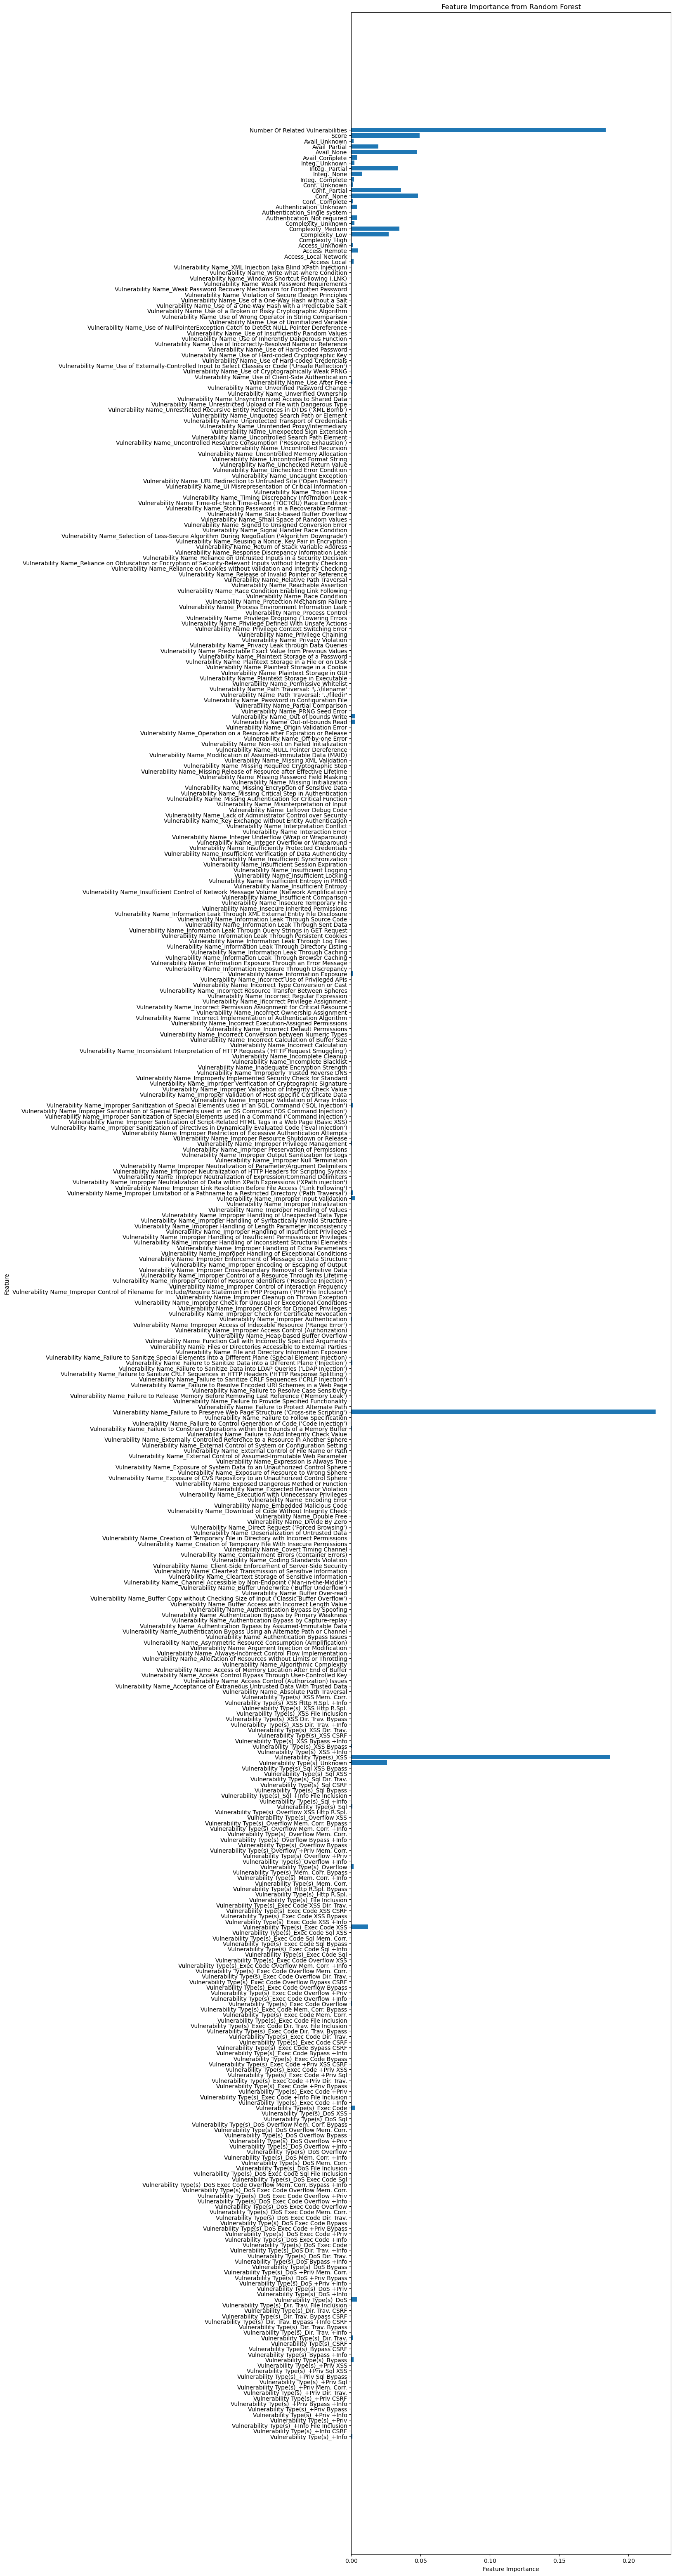

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

x = ohe
y = df[label]
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

model = RandomForestClassifier()
model.fit(X_train, y_train)

feature_importances = model.feature_importances_

plt.figure(figsize=(10, 80))
plt.barh(range(len(feature_importances)), feature_importances, tick_label=ohe.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.show()

In [26]:
important_cols = ['Vulnerability Type(s)_+Info','Vulnerability Type(s)_Bypass','Vulnerability Type(s)_Dir. Trav.',
'Vulnerability Type(s)_DoS','Vulnerability Type(s)_Exec Code','Vulnerability Type(s)_Exec Code Overflow',
'Vulnerability Type(s)_Exec Code XSS','Vulnerability Type(s)_Overflow','Vulnerability Type(s)_Sql',
'Vulnerability Type(s)_Unknown','Vulnerability Type(s)_XSS','Vulnerability Type(s)_XSS Bypass',
'Vulnerability Name_Failure to Constrain Operations within the Bounds of a Memory Buffer',
"Vulnerability Name_Failure to Preserve Web Page Structure ('Cross-site Scripting')",
"Vulnerability Name_Failure to Sanitize Data into a Different Plane ('Injection')",
'Vulnerability Name_Improper Authentication','Vulnerability Name_Improper Input Validation',
"Vulnerability Name_Improper Limitation of a Pathname to a Restricted Directory ('Path Traversal')",
'Vulnerability Name_Improper Privilege Management',
"Vulnerability Name_Improper Sanitization of Special Elements used in an SQL Command ('SQL Injection')",
'Vulnerability Name_Information Exposure','Vulnerability Name_Out-of-bounds Read','Vulnerability Name_Out-of-bounds Write',
'Vulnerability Name_Use After Free','Access_Local','Access_Remote','Access_Unknown','Complexity_Low','Complexity_Medium',
'Complexity_Unknown','Authentication_Not required','Authentication_Unknown','Conf._Complete','Conf._None','Conf._Partial',
'Conf._Unknown','Integ._Complete','Integ._None','Integ._Partial','Integ._Unknown','Avail_Complete','Avail_None',
'Avail_Partial','Avail_Unknown','Score','Number Of Related Vulnerabilities']

len(important_cols)
ohe[important_cols]


,Vulnerability Type(s)_+Info,Vulnerability Type(s)_Bypass,Vulnerability Type(s)_Dir. Trav.,Vulnerability Type(s)_DoS,Vulnerability Type(s)_Exec Code,Vulnerability Type(s)_Exec Code Overflow,Vulnerability Type(s)_Exec Code XSS,Vulnerability Type(s)_Overflow,Vulnerability Type(s)_Sql,Vulnerability Type(s)_Unknown,...,Integ._Complete,Integ._None,Integ._Partial,Integ._Unknown,Avail_Complete,Avail_None,Avail_Partial,Avail_Unknown,Score,Number Of Related Vulnerabilities
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,4.3,22413.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,7.5,3011.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,5.8,754.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,5.0,9380.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.1,394.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61693,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,4.3,22413.0
61694,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,1320.0
61695,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,5.8,754.0
61696,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,4.3,22413.0


In [71]:
important_cols

['Vulnerability Type(s)_+Info',
 'Vulnerability Type(s)_Bypass',
 'Vulnerability Type(s)_Dir. Trav.',
 'Vulnerability Type(s)_DoS',
 'Vulnerability Type(s)_Exec Code',
 'Vulnerability Type(s)_Exec Code Overflow',
 'Vulnerability Type(s)_Exec Code XSS',
 'Vulnerability Type(s)_Overflow',
 'Vulnerability Type(s)_Sql',
 'Vulnerability Type(s)_Unknown',
 'Vulnerability Type(s)_XSS',
 'Vulnerability Type(s)_XSS Bypass',
 'Vulnerability Name_Failure to Constrain Operations within the Bounds of a Memory Buffer',
 "Vulnerability Name_Failure to Preserve Web Page Structure ('Cross-site Scripting')",
 "Vulnerability Name_Failure to Sanitize Data into a Different Plane ('Injection')",
 'Vulnerability Name_Improper Authentication',
 'Vulnerability Name_Improper Input Validation',
 "Vulnerability Name_Improper Limitation of a Pathname to a Restricted Directory ('Path Traversal')",
 'Vulnerability Name_Improper Privilege Management',
 "Vulnerability Name_Improper Sanitization of Special Elements use

## 2 - Recursive Feature Elimination (RFE):
RFE is a technique that recursively removes the least important features from the model. It works well with models that support feature importance ranking.

In [33]:
from sklearn.feature_selection import RFE

x = ohe
y = df[label]
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

model = RandomForestClassifier()
rfe = RFE(model, n_features_to_select=50)
rfe.fit(X_train, y_train)

selected_features = X_train.columns[rfe.support_]

C:\Users\pc\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
C:\Users\pc\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
C:\Users\pc\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
C:\Users\pc\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

C:\Users\pc\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
C:\Users\pc\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
C:\Users\pc\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
C:\Users\pc\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

C:\Users\pc\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
C:\Users\pc\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
C:\Users\pc\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
C:\Users\pc\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

C:\Users\pc\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
C:\Users\pc\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
C:\Users\pc\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
C:\Users\pc\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

C:\Users\pc\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
C:\Users\pc\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
C:\Users\pc\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
C:\Users\pc\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

C:\Users\pc\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
C:\Users\pc\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
C:\Users\pc\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
C:\Users\pc\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

C:\Users\pc\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
C:\Users\pc\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
C:\Users\pc\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
C:\Users\pc\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

C:\Users\pc\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
C:\Users\pc\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
C:\Users\pc\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
C:\Users\pc\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

C:\Users\pc\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
C:\Users\pc\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
C:\Users\pc\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
C:\Users\pc\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

C:\Users\pc\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
C:\Users\pc\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
C:\Users\pc\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
C:\Users\pc\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

C:\Users\pc\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
C:\Users\pc\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
C:\Users\pc\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
C:\Users\pc\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

C:\Users\pc\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
C:\Users\pc\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
C:\Users\pc\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
C:\Users\pc\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

C:\Users\pc\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
C:\Users\pc\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
C:\Users\pc\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
C:\Users\pc\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

In [115]:
ohe_mn_scaled[selected_features]

,Vulnerability Type(s)_+Info,Vulnerability Type(s)_+Priv XSS,Vulnerability Type(s)_Bypass,Vulnerability Type(s)_Dir. Trav.,Vulnerability Type(s)_DoS,Vulnerability Type(s)_Exec Code,Vulnerability Type(s)_Exec Code +Priv XSS,Vulnerability Type(s)_Exec Code XSS,Vulnerability Type(s)_Exec Code XSS +Info,Vulnerability Type(s)_Exec Code XSS Bypass,...,Conf._None,Conf._Partial,Conf._Unknown,Integ._None,Integ._Partial,Integ._Unknown,Avail_None,Avail_Partial,Score,Number Of Related Vulnerabilities
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.43,1.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.75,0.134303
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.58,0.033598
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.50,0.418481
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.21,0.017535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61693,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.43,1.000000
61694,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.50,0.058852
61695,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.58,0.033598
61696,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.43,1.000000


# Model test

In [160]:
from sklearn.model_selection import cross_val_score,cross_validate,ShuffleSplit,train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

from sklearn.linear_model import LogisticRegression,RidgeClassifierCV
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB,CategoricalNB
from sklearn.svm import LinearSVC,NuSVC,SVC
from sklearn.neighbors import KNeighborsClassifier,RadiusNeighborsClassifier
from sklearn.neural_network import MLPClassifier,BernoulliRBM
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,RandomForestClassifier,ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier,StackingClassifier,GradientBoostingClassifier,HistGradientBoostingClassifier


X = ohe_3
y = df[label]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

model = BernoulliNB()

#Cross Validation score
cv = ShuffleSplit(test_size=0.2)
cv_results = cross_validate(model, X=X_train, y=y_train, cv=cv, return_train_score=True)
cross_val_scores = cross_val_score(model, X=X_train, y=y_train, cv=cv)
print("Mean CV Score:", cross_val_scores.mean())
print("Train Score:", cv_results['train_score'].mean())

#fit the model
model.fit(X_train, y_train)
validation_score = model.score(X_test, y_test)
print("Validation Score:", validation_score)

#evaluation
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))



C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Mean CV Score: 0.9947325769854134
Train Score: 0.9943296358202908
Validation Score: 0.9931118314424635
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2097
           1       0.99      1.00      1.00     10243

    accuracy                           0.99     12340
   macro avg       0.99      0.98      0.99     12340
weighted avg       0.99      0.99      0.99     12340

[[ 2038    59]
 [   26 10217]]
0.9931118314424635


In [171]:
from sklearn.model_selection import cross_val_score,cross_validate,ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression,Lasso
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB,CategoricalNB
from sklearn.svm import LinearSVC,NuSVC,SVC
from sklearn.neighbors import KNeighborsClassifier,RadiusNeighborsClassifier
from sklearn.neural_network import MLPClassifier,BernoulliRBM



categorical_cols_2 = ['Access','Complexity', 'Authentication', 'Conf.', 'Integ.', 'Avail']
ohe_4 = pd.concat([
    pd.get_dummies(df[categorical_cols_2],dtype=float),
    df[numerical_cols]
],axis=1)


X = ohe_4
y = df[label]
# MultinomialNB 0.94 , BernoulliNB 0.96 , LinearSVC 0.93

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

model = LogisticRegression()

cv = ShuffleSplit(test_size=0.2)
cv_results = cross_validate(model,X=X_train,y=y_train,cv=cv,return_train_score=True)
cross_val_scores = cross_val_score(model,X=X_train,y=y_train, cv=cv)
print("Mean CV Score:", cross_val_scores.mean())
print("Train Score:", cv_results['train_score'].mean())

model.fit(X_train, y_train)
validation_score = model.score(X_test, y_test)
print("Validation Score:", validation_score)

y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))


C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

C:\Users\pc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter)

Mean CV Score: 0.9999493517017829
Train Score: 0.9999696094818417
Validation Score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2012
           1       1.00      1.00      1.00     10328

    accuracy                           1.00     12340
   macro avg       1.00      1.00      1.00     12340
weighted avg       1.00      1.00      1.00     12340

[[ 2012     0]
 [    0 10328]]
1.0


C:\Users\pc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [172]:
important_features = ['Access','Complexity', 'Authentication', 'Conf.', 'Integ.', 'Avail']
